In [12]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# Base directory containing the datasets
base_dir = "./anomaly_results"

# Subdirectories within the base directory
datasets = ['FS_Static', 'FS_Static_C', 'RoadAnomaly']

# Patch divisions within each dataset directory
patch_divisions = ['1_1', '2_2', '4_4']

# Initialize dictionaries to hold the contents of the .npy files
data_dict = {
    'FS_Static': {},
    'FS_Static_C': {},
    'RoadAnomaly': {},
}

# Traverse through the directories and collect the file contents
for dataset in datasets:
    for patch_division in patch_divisions:
        # Construct the directory path
        dir_path = os.path.join(base_dir, dataset, patch_division)
        
        # Check if the directory exists
        if os.path.exists(dir_path):
            # Construct the file paths
            anomaly_score_file = os.path.join(dir_path, 'anomaly_score_list.npy')
            ood_gts_file = os.path.join(dir_path, 'ood_gts_list.npy')
            
            # Load the contents of the files if they exist and add to the dictionaries
            if os.path.isfile(anomaly_score_file):
                anomaly_score_data = np.load(anomaly_score_file)
                if patch_division not in data_dict[dataset]:
                    data_dict[dataset][patch_division] = {}
                data_dict[dataset][patch_division]['anomaly_score_list'] = anomaly_score_data

            if os.path.isfile(ood_gts_file):
                ood_gts_data = np.load(ood_gts_file)
                if 'ood_gts_list' not in data_dict[dataset]:
                    data_dict[dataset]['ood_gts_list'] = ood_gts_data

In [ ]:
def print_values_in_range(arr):
    # Flatten the array to make it easier to iterate through
    flattened_array = arr.flatten()
    # Filter the values that are > 0 and < 1
    filtered_values = flattened_array[(flattened_array > 0)]
    # Print the filtered values
    for value in filtered_values:
        print(value)

print_values_in_range(ood_gts_data)


In [60]:
np.shape(ood_gts_data)

(60, 1, 720, 1280)

In [62]:
ood_gts_data[ood_gts_data>0]

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [8]:
data_dict['FS_Static']['1_1']['anomaly_score_list'].shape

(30, 1, 1024, 2048)

In [64]:
ood_gts_data[ood_gts_data>1]

array([], dtype=int64)

In [66]:
from PIL import Image
image_0 = Image.open('C:/Users/lucas/OneDrive/Documents/MA4/PDS/ATTA-main/data/fs_static/labels/image_0.png')

In [68]:
image_0_np = np.array(image_0)

In [72]:
np.bincount(image_0_np.ravel())

array([1801918,   59867,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,       0,       0,       0,       0,       0,       0,
             0,     

In [42]:
import os
import matplotlib.pyplot as plt

# Create the directory to save the plots if it doesn't exist
output_dir = './anomalies_heatmap'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plotting the results
for dataset, patches in data_dict.items():
    # Collecting anomaly score data for all patch divisions
    anomaly_scores = [patches[patch_division]['anomaly_score_list'] for patch_division in patch_divisions if patch_division in patches]
    ood_gts_data = patches.get('ood_gts_list', None)

    if anomaly_scores and ood_gts_data is not None:
        num_images = anomaly_scores[0].shape[0]
        
        fig, axs = plt.subplots(num_images, len(patch_divisions) + 1, figsize=(15, 2.5 * num_images))
        fig.suptitle(f'{dataset}', fontsize=16)
        
        for i in range(num_images):
            for j, patch_division in enumerate(patch_divisions):
                if j < len(anomaly_scores):
                    # Plot anomaly scores for each patch division
                    axs[i, j].imshow(anomaly_scores[j][i, 0], cmap='magma')
                    if i == 0:
                        axs[i, j].set_title(f'Anomaly Prediction {patch_division}')
                    axs[i, j].axis('off')
            
            # Plot OOD GTS (same for all patch divisions)
            axs[i, len(patch_divisions)].imshow(ood_gts_data[i, 0], cmap='magma')
            if i == 0:
                axs[i, len(patch_divisions)].set_title('Labels')
            axs[i, len(patch_divisions)].axis('off')
        
        plt.tight_layout()
        plt.subplots_adjust(top=0.95, hspace=0.1, left=0.15)  # Adjust hspace and left to reduce spacing and add left margin
        
        # Save the plot
        output_path = os.path.join(output_dir, f'{dataset}_heatmap.png')
        plt.savefig(output_path)
        plt.close(fig)
    else:
        print(f"Skipping plotting for dataset: {dataset}")


In [43]:
import matplotlib.pyplot as plt

def print_image_line(dataset_name, image_index):
    dataset = data_dict.get(dataset_name, None)
    if not dataset:
        print(f"Dataset {dataset_name} not found.")
        return

    anomaly_scores = [dataset[patch_division]['anomaly_score_list'] for patch_division in patch_divisions if patch_division in dataset]
    ood_gts_data = dataset.get('ood_gts_list', None)

    if not anomaly_scores or ood_gts_data is None:
        print(f"Data for dataset {dataset_name} is incomplete.")
        return
    
    if image_index >= len(anomaly_scores[0]):
        print(f"Image index {image_index} is out of bounds for dataset {dataset_name}.")
        return

    fig, axs = plt.subplots(1, len(patch_divisions) + 1, figsize=(15, 2.5))
    fig.suptitle(f'{dataset_name} - Image {image_index+1}', fontsize=16)

    for j, patch_division in enumerate(patch_divisions):
        if j < len(anomaly_scores):
            # Plot anomaly scores for each patch division
            axs[j].imshow(anomaly_scores[j][image_index, 0], cmap='magma')
            axs[j].set_title(f'Anomaly Prediction {patch_division}')
            axs[j].axis('off')
    
    # Plot OOD GTS (same for all patch divisions)
    axs[len(patch_divisions)].imshow(ood_gts_data[image_index, 0], cmap='magma')
    axs[len(patch_divisions)].set_title('Labels')
    axs[len(patch_divisions)].axis('off')
    
    plt.tight_layout()
    plt.subplots_adjust(top=0.85, hspace=0.1, left=0.15)  # Adjust hspace and left to reduce spacing and add left margin
    plt.show()


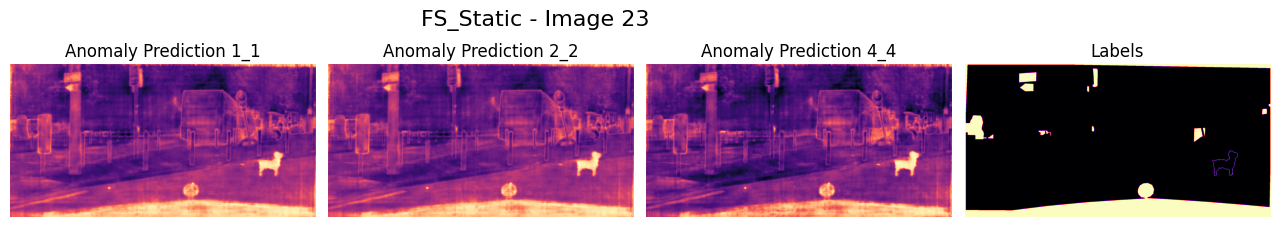

In [45]:
print_image_line('FS_Static', 22)

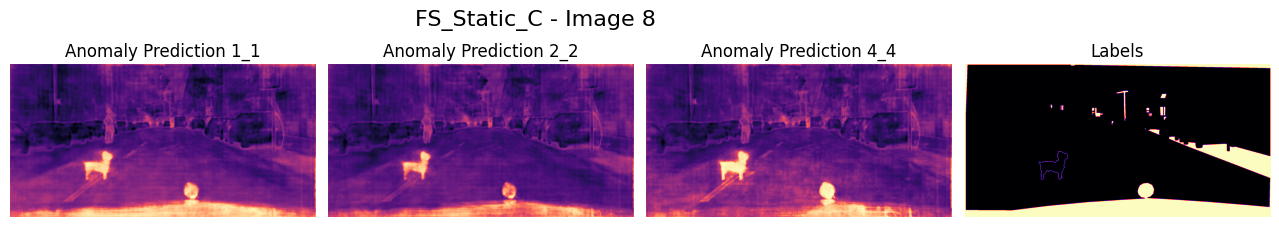

In [49]:
print_image_line('FS_Static_C', 7)

In [ ]:
np.bincount()